<font size = "3">
QTM 151 Section 4
Group Member: Nate Hu, Max Jiang, Garry Zhu

Introduction (Background Analysis):

Formula 1 is a premier motorsport competition recognized globally for its high-speed racing, cutting-edge technology, and iconic drivers and teams. This project aims to delve into the world of Formula 1, exploring various aspects of the competition, such as circuit characteristics, race results, driver performance, constructor success, and race statuses. Understanding the intricacies of this sport is relevant not only to fans and enthusiasts but also to stakeholders such as teams, sponsors, and broadcasters who can leverage insights to make informed decisions and improve various aspects of the competition.

Undertsanding the Schema:

In this project, we analyze a comprehensive Formula 1 dataset, focusing on different levels of the competition, including circuit, race, driver, constructor, and status. The goal is to extract meaningful insights and patterns that can help us answer key questions about the sport, such as identifying the most successful drivers or constructors, understanding the impact of circuit characteristics on race outcomes, and assessing the factors that contribute to the overall performance of a driver or a team. The project is structured into different sections, each addressing a specific level of the competition. The results of our analysis will be presented in a clear and concise manner, supported by visualizations and data-driven conclusions that cater to both Formula 1 aficionados and novices alike.

Question:
- Examine the range of time the dataset contains
- Which Country have the most drivers?
- Which Country held the most races?


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import psycopg2
import sqlalchemy as sa
from   sqlalchemy.engine import URL
from   sqlalchemy import text

In [16]:
url_server = URL.create(
    "postgresql",
    host = 'localhost',
    database = 'postgres',
    username = 'postgres',
    port = 5432,
    password  = '')

con = sa.create_engine(url_server).connect()

In [2]:
circuits = pd.read_csv("data_raw/circuits.csv")
constructors_results = pd.read_csv("data_raw/constructor_results.csv")
constructors_standings = pd.read_csv("data_raw/constructor_standings.csv")
constructors = pd.read_csv("data_raw/constructors.csv")
driver_standing = pd.read_csv("data_raw/driver_standings.csv")
drivers = pd.read_csv("data_raw/drivers.csv")
lap_times = pd.read_csv("data_raw/lap_times.csv")
pit_stops = pd.read_csv("data_raw/pit_stops.csv")
qualifying = pd.read_csv("data_raw/qualifying.csv")
races = pd.read_csv("data_raw/races.csv")
results = pd.read_csv("data_raw/results.csv")
seasons = pd.read_csv("data_raw/seasons.csv")
sprint_results = pd.read_csv("data_raw/sprint_results.csv")
status = pd.read_csv("data_raw/status.csv")

In [17]:
circuits.to_sql("circuits", con = con, if_exists='replace')
constructors_results.to_sql("constructor_results", con = con, if_exists='replace')
constructors.to_sql("constructors", con = con, if_exists='replace')
constructors_standings.to_sql("constructor_standings", con = con, if_exists='replace')
drivers.to_sql("drivers", con = con, if_exists='replace')
driver_standing.to_sql("driver_standings", con = con, if_exists='replace')
lap_times.to_sql("lap_times", con = con, if_exists='replace')
pit_stops.to_sql("pit_stops", con = con, if_exists='replace')
qualifying.to_sql("qualifying", con = con, if_exists='replace')
races.to_sql("races", con = con, if_exists='replace')
results.to_sql("results", con = con, if_exists='replace')
seasons.to_sql("seasons", con = con, if_exists='replace')
status.to_sql("status", con = con, if_exists='replace')

139

In [23]:
#Finding the range of time the datasets contains
pd.read_sql(text("SELECT MAX(year) AS last_year, MIN(year) AS first_year \
                FROM seasons;"),con)

,last_year,first_year
0,2023,1950


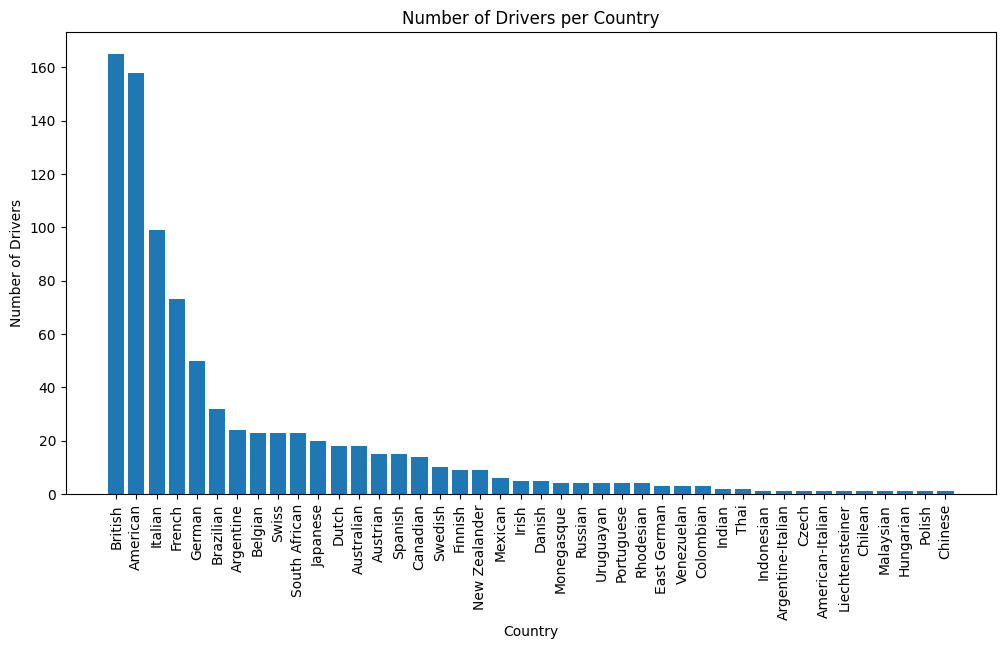

In [18]:
driver_counts = drivers["nationality"].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(driver_counts.index, driver_counts.values)
plt.xlabel("Country")
plt.ylabel("Number of Drivers")
plt.title("Number of Drivers per Country")
plt.xticks(rotation=90)
plt.show()

In [26]:
#Finding the number of races held by each country
races_merge = pd.merge(races,
                       circuits,
                       on = "circuitId",
                       how = "left")

display(races_merge.head(10))

,raceId,year,round,circuitId,name_x,date,time,url_x,fp1_date,fp1_time,...,sprint_date,sprint_time,circuitRef,name_y,location,country,lat,lng,alt,url_y
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,...,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,...,\N,\N,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,...,\N,\N,shanghai,Shanghai International Circuit,Shanghai,China,31.33890,121.22000,5,http://en.wikipedia.org/wiki/Shanghai_Internat...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,...,\N,\N,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,...,\N,\N,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
5,6,2009,6,6,Monaco Grand Prix,2009-05-24,12:00:00,http://en.wikipedia.org/wiki/2009_Monaco_Grand...,\N,\N,...,\N,\N,monaco,Circuit de Monaco,Monte-Carlo,Monaco,43.73470,7.42056,7,http://en.wikipedia.org/wiki/Circuit_de_Monaco
6,7,2009,7,5,Turkish Grand Prix,2009-06-07,12:00:00,http://en.wikipedia.org/wiki/2009_Turkish_Gran...,\N,\N,...,\N,\N,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park
7,8,2009,8,9,British Grand Prix,2009-06-21,12:00:00,http://en.wikipedia.org/wiki/2009_British_Gran...,\N,\N,...,\N,\N,silverstone,Silverstone Circuit,Silverstone,UK,52.07860,-1.01694,153,http://en.wikipedia.org/wiki/Silverstone_Circuit
8,9,2009,9,20,German Grand Prix,2009-07-12,12:00:00,http://en.wikipedia.org/wiki/2009_German_Grand...,\N,\N,...,\N,\N,nurburgring,Nürburgring,Nürburg,Germany,50.33560,6.94750,578,http://en.wikipedia.org/wiki/N%C3%BCrburgring
9,10,2009,10,11,Hungarian Grand Prix,2009-07-26,12:00:00,http://en.wikipedia.org/wiki/2009_Hungarian_Gr...,\N,\N,...,\N,\N,hungaroring,Hungaroring,Budapest,Hungary,47.57890,19.24860,264,http://en.wikipedia.org/wiki/Hungaroring


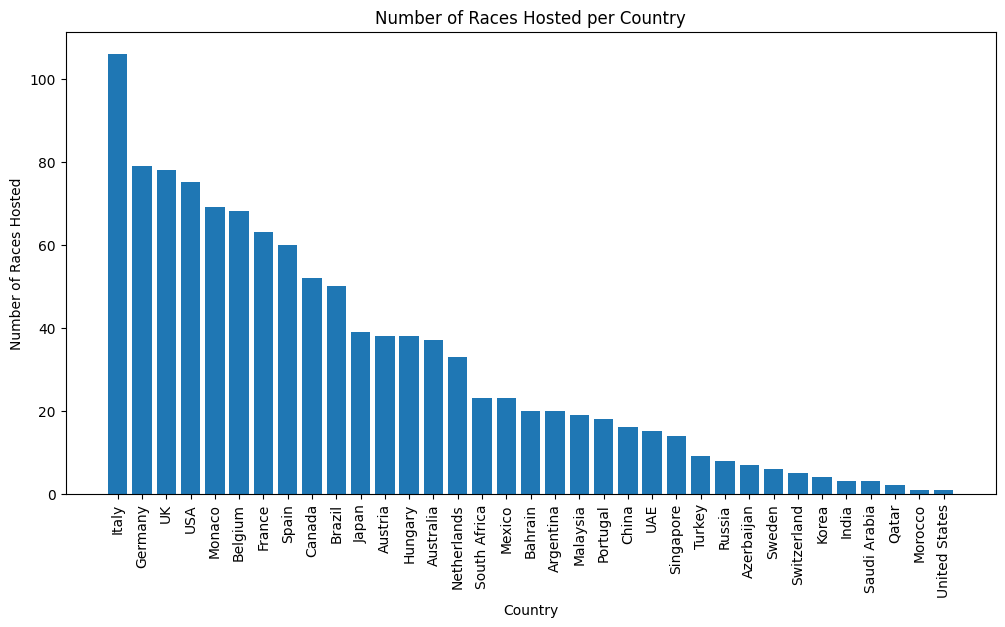

In [31]:
race_counts = races_merge["country"].value_counts()
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(race_counts.index, race_counts.values)
plt.xlabel("Country")
plt.ylabel("Number of Races Hosted")
plt.title("Number of Races Hosted per Country")
plt.xticks(rotation=90)
plt.show()

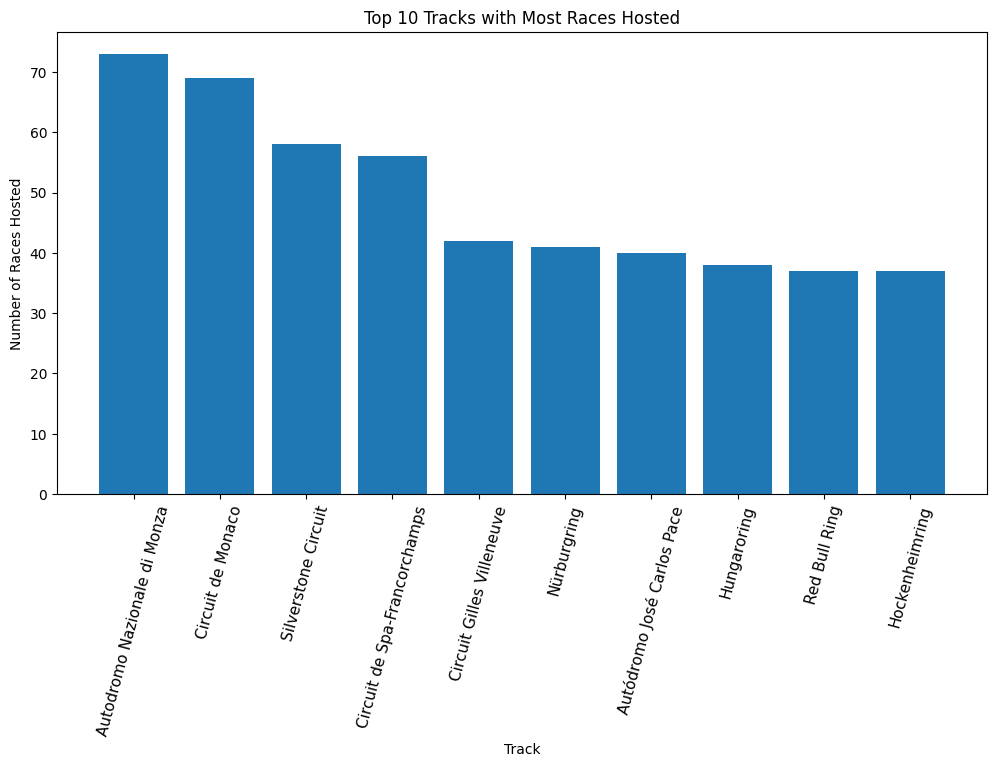

In [39]:
track_counts = races_merge["name_y"].value_counts()

top_10_race_counts = track_counts.sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(top_10_race_counts.index, top_10_race_counts.values)
plt.xlabel("Track")
plt.ylabel("Number of Races Hosted")
plt.title("Top 10 Tracks with Most Races Hosted")
ax.xaxis.set_tick_params(labelsize = 11,
                         rotation=75,
                         colors = "black")
plt.show()
